In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

In [2]:
int('11101101', 2)

237

In [3]:
bin(109)

'0b1101101'

In [6]:
# bits Flipping
def flip(chain):
    n = len(chain)
    f = bin(int(chain, 2) ^ int('1'*n, 2))[2:]
    if len(f)==n:
        return f
    else:
        return ('0'*(n-len(f))+f)

In [7]:
def add_1(chain): # does not control overflow!!
    tmp = bin(int(chain,2)+1)[2:]
    return '0'*(len(chain)-len(tmp))+tmp

In [8]:
def twos_comp(val):
    """compute the 2's complement of int value val"""
    return add_1(flip(val))

In [9]:
def posit_to_real(p, es):
    """compute the real value given a posit and the exponent number of bits, es"""
    useed = 2**(2**es)
    
    # exceptions
    if p[1:] == '0'*(len(p)-1):
        if p[0] == '1':
            return 'inf'
        else:
            return 0
    
    # s<- sign bit
    if p[0]=='0':
        s = 1
    else:
        s = -1
        # 2-complement
        p = ('0'+twos_comp(p[1:]))
    
    # k<- regime
    r = 1
    reg = p[1]
    while r < len(p) and p[r]==reg:
        r = r+1
    if reg=='0':
        k = -(r-1)
    else:
        k = r-2
    
    # es = 0, no exponent bits
    # f<- fraction
    r = r+1
    if r < len(p):
        exp = len(p)-r        
        f = 1+(int(p[r:], 2)/np.power(2,exp))        
    else:
        f = 1
    
    #return (s,k,f,(s*(useed**k)*f))
    return (s*(useed**k)*f)

In [10]:
posit_to_real('00000001', 0)

0.015625

In [11]:
def posit_sigmoid(p):
    n = len(p)
    tmp = bin((int(p, 2)^int('1'+'0'*(n-1), 2)) >> 2)
    return ('0'*(n-len(tmp)+2)+tmp[2:])

In [12]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

In [13]:
posit_to_real(posit_sigmoid('10000000'),0)

0

### Test with Posits(8,0)

<IPython.core.display.Javascript object>


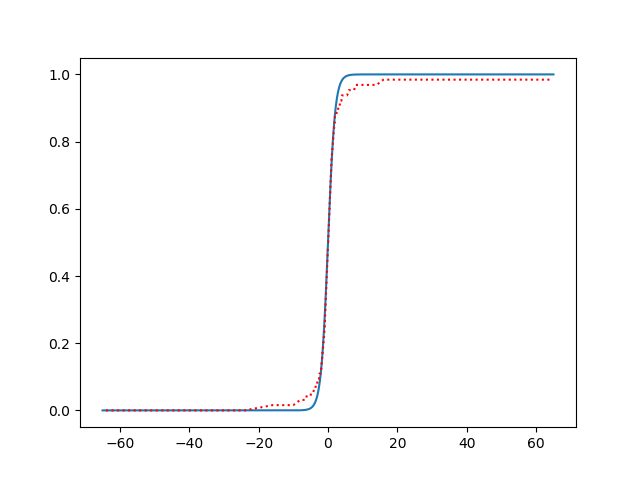

0.060664021611295804
0.0
0.04881276924864368
1.603810890548638e-28


In [19]:
# list with all combinations
_8bits = [''.join(map(str, i)) for i in product([0,1], repeat=8)]

x = np.linspace(-65, 65, 1000)
plt.figure()
plt.plot(x,sigmoid(x))

# plot Posits
posit_x = np.empty(len(_8bits))
posit_y = np.empty(len(_8bits))
for i in range(len(_8bits)):
    posit_x[i] = posit_to_real(_8bits[i],0)
    posit_y[i] = posit_to_real(posit_sigmoid(_8bits[i]),0)
plt.plot(posit_x,posit_y, ':', c='r')
plt.show()
#plt.plot('inf',0, '*', c='r')
print(max(np.abs(posit_y[:128] - sigmoid(posit_x[:128]))))
print(min(np.abs(posit_y[:128] - sigmoid(posit_x[:128]))))
print(max(np.abs(posit_y[129:] - sigmoid(posit_x[129:]))))
print(min(np.abs(posit_y[129:] - sigmoid(posit_x[129:]))))

### Test with Posits(16,0)

In [25]:
_16bits = [''.join(map(str, i)) for i in product([0,1], repeat=16)]
print(len(_16bits)/2) #32768 
posit_to_real(_16bits[31000],0) # 10.1875

32768.0


10.1875

<IPython.core.display.Javascript object>


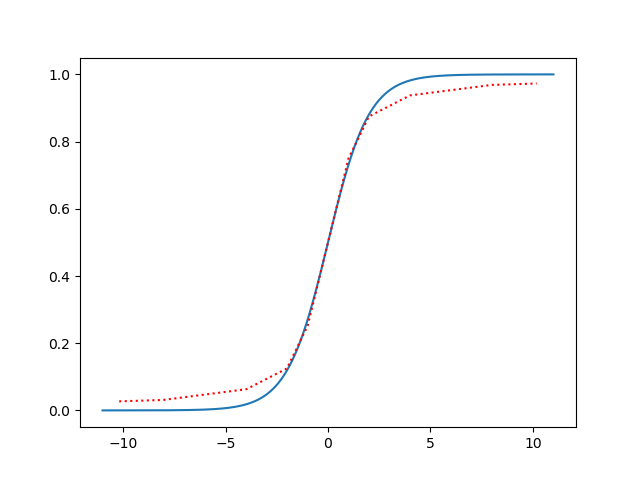

0.049000311288352916
0.0


In [26]:
x = np.linspace(-11, 11, 1000)
plt.figure()
plt.plot(x,sigmoid(x))

# plot Posits
posit_x = np.empty(31000*2)
posit_y = np.empty(31000*2)
for i in range(31000):
    posit_x[31000+i] = posit_to_real(_16bits[i],0)
    posit_y[31000+i] = posit_to_real(posit_sigmoid(_16bits[i]),0)
    posit_x[i] = posit_to_real(_16bits[-31000+i],0)
    posit_y[i] = posit_to_real(posit_sigmoid(_16bits[-31000+i]),0)
plt.plot(posit_x,posit_y, ':', c='r')
plt.show()
#plt.plot('inf',0, '*', c='r')
print(max(np.abs(posit_y - sigmoid(posit_x))))
print(min(np.abs(posit_y - sigmoid(posit_x))))

### Test with Posits(32,0)
WARNING: Computationally very expensive!!
(Maybe it is not worthy)

In [17]:
# _32bits = [''.join(map(str, i)) for i in product([0,1], repeat=32)]

In [32]:
print(len(_32bits)/2) #2147483648
posit_to_real('0'+'1'*31,0) # Max value = 1073741824
posit_to_real(_32bits[-31000],0) # Value "close" to 0

NameError: name '_32bits' is not defined

In [ ]:
x = np.linspace(-11, 11, 1000)
plt.figure()
plt.plot(x,sigmoid(x))

# plot Posits
posit_x = np.empty(31000*2)
posit_y = np.empty(31000*2)
for i in range(31000):
    posit_x[31000+i] = posit_to_real(_32bits[i],0)
    posit_y[31000+i] = posit_to_real(posit_sigmoid(_32bits[i]),0)
    posit_x[i] = posit_to_real(_32bits[-31000+i],0)
    posit_y[i] = posit_to_real(posit_sigmoid(_32bits[-31000+i]),0)
plt.plot(posit_x,posit_y, ':', c='r')
plt.show()
#plt.plot('inf',0, '*', c='r')
print(max(np.abs(posit_y - sigmoid(posit_x))))
print(min(np.abs(posit_y - sigmoid(posit_x))))

In [31]:
posit_to_real('0'+'1'*31,0)

1073741824